In [1]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import style
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing, svm, metrics  
import math
from keras import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv('./Real estate.csv', index_col=False)

In [3]:
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
L = len(data)
print(L)

414


In [5]:
X = data[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
X.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,32.0,84.87882,10,24.98298,121.54024
1,19.5,306.59470,9,24.98034,121.53951
2,13.3,561.98450,5,24.98746,121.54391
3,13.3,561.98450,5,24.98746,121.54391
4,5.0,390.56840,5,24.97937,121.54245


In [6]:
Y = data[['Y house price of unit area']]
Y.head()

,Y house price of unit area
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1


In [7]:
def normalize_x(X1, X2, X3, X4, X5):
    Z = []
    x1min, x2min, x3min, x4min, x5min = np.amin(X1), np.amin(X2), np.amin(X3), np.amin(X4), np.amin(X5)
    x1max, x2max, x3max, x4max, x5max = np.amax(X1), np.amax(X2), np.amax(X3), np.amax(X4), np.amax(X5)
    d1, d2, d3, d4, d5 = x1max-x1min, x2max-x2min, x3max-x3min, x4max-x4min, x5max-x5min
    for i in range(L):
        q1 = (X1[i] - x1min)/d1
        q2 = (X2[i] - x2min)/d2
        q3 = (X3[i] - x3min)/d3
        q4 = (X4[i] - x4min)/d4
        q5 = (X5[i] - x5min)/d5
        Z.append([q1,q2,q3,q4,q5])
    Z = np.asarray(Z)
    return Z

In [8]:
Xn = normalize_x(X[['X2 house age'][0]], X[['X3 distance to the nearest MRT station'][0]], X[['X4 number of convenience stores'][0]], X[['X5 latitude'][0]], X[['X6 longitude'][0]])
print(Xn[0:5])

[[0.73059361 0.00951267 1.         0.61694135 0.71932284]
 [0.44520548 0.04380939 0.9        0.5849491  0.71145137]
 [0.30365297 0.08331505 0.5        0.67123122 0.75889584]
 [0.30365297 0.08331505 0.5        0.67123122 0.75889584]
 [0.11415525 0.05679909 0.5        0.57319438 0.7431529 ]]


In [9]:
def normalize_y(Y):
    Z = []
    ymin = np.amin(Y)
    ymax = np.amax(Y)
    d = ymax - ymin
    for i in range(len(Y)):
        Z.append((Y[i] - ymin)/d)
    Z = np.asarray(Z)
    return Z

In [10]:
Yn = normalize_y(Y[['Y house price of unit area'][0]])
print(Yn[0:5])

[0.27570519 0.31483167 0.36123749 0.42948135 0.32302093]


In [11]:
X_train, X_test, Y_train, Y_test =  train_test_split(Xn, Yn, test_size=0.05, shuffle=True)

In [12]:
# reshaping X to [samples, timestamps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
print(f"X_train shape is: {X_train.shape}, X_test shape is: {X_test.shape}, Y_train shape is: {Y_train.shape}, Y_test shape is: {Y_test.shape}")

X_train shape is: (393, 1, 5), X_test shape is: (21, 1, 5), Y_train shape is: (393,), Y_test shape is: (21,)


In [13]:
M = Sequential()
M.add(LSTM(64, input_shape=(X_train.shape[1],X_train.shape[2]), return_sequences=True))
M.add(LSTM(32))
M.add(Dense(16, activation='relu'))
M.add(Dense(1))

print(M.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 64)             17920     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 30,881
Trainable params: 30,881
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
Ymax = np.amax(Y[['Y house price of unit area'][0]]) 
Ymin = np.amin(Y[['Y house price of unit area'][0]])
D = Ymax - Ymin

In [15]:
def rev_normalize(pr):
    Z = []
    for i in range(len(pr)):
        Z.append((pr[i]*D)+Ymin)
    Z = np.asarray(Z)
    return Z

In [16]:
M.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])
h = M.fit(X_train, Y_train, epochs=30, batch_size=50, verbose=1, validation_split=0.2)

Epoch 1/30
7/7 [==============================] - 5s 168ms/step - loss: 0.2550 - mean_squared_error: 0.0804 - val_loss: 0.2462 - val_mean_squared_error: 0.0758
Epoch 2/30
7/7 [==============================] - 0s 8ms/step - loss: 0.2088 - mean_squared_error: 0.0584 - val_loss: 0.1899 - val_mean_squared_error: 0.0495
Epoch 3/30
7/7 [==============================] - 0s 8ms/step - loss: 0.1518 - mean_squared_error: 0.0352 - val_loss: 0.1305 - val_mean_squared_error: 0.0258
Epoch 4/30
7/7 [==============================] - 0s 7ms/step - loss: 0.1055 - mean_squared_error: 0.0187 - val_loss: 0.0903 - val_mean_squared_error: 0.0130
Epoch 5/30
7/7 [==============================] - 0s 7ms/step - loss: 0.0893 - mean_squared_error: 0.0133 - val_loss: 0.0879 - val_mean_squared_error: 0.0116
Epoch 6/30
7/7 [==============================] - 0s 7ms/step - loss: 0.0881 - mean_squared_error: 0.0127 - val_loss: 0.0825 - val_mean_squared_error: 0.0109
Epoch 7/30
7/7 [==============================] - 

In [17]:
import sklearn.metrics as metrics

p = M.predict(X_test)
P = rev_normalize(p)

yt = rev_normalize(Y_test)

# Accuracy evaluation
A = sklearn.metrics.mean_absolute_error(Y_test, p)           # Best possibe result would be 0.0
print("Accuracy is:", A)

np.set_printoptions(suppress=True)

# Printing results
print("Predictions:")
print(P)
print("Expected values:")
print(yt)

Accuracy is: 0.047570113346566245
Predictions:
[[35.10943 ]
 [16.251408]
 [45.625374]
 [16.159048]
 [28.454739]
 [46.488407]
 [44.621414]
 [15.811779]
 [34.319443]
 [37.229637]
 [38.770092]
 [44.658173]
 [28.009403]
 [21.586283]
 [27.547056]
 [47.50829 ]
 [53.776432]
 [42.38387 ]
 [44.06574 ]
 [29.595373]
 [50.29799 ]]
Expected values:
[37.4 15.6 51.  20.5 23.9 53.3 51.6 18.6 50.5 36.5 46.  51.8 37.  19.1
 26.6 56.8 56.3 45.4 34.4 28.9 43.2]


<Figure size 2160x1440 with 0 Axes>

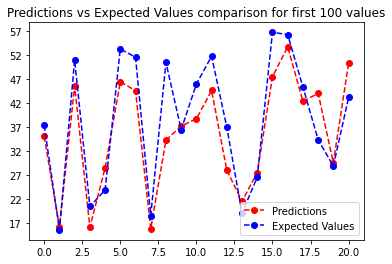

<Figure size 2160x1440 with 0 Axes>

In [18]:
L_t = range(len(yt))
ylabels = []
for i in range(math.floor(np.amin(yt)-3),math.ceil(np.amax(yt)+3),5):
    ylabels.append(i)
plt.yticks(ylabels,ylabels)
plt.plot(L_t, P, 'r', linestyle='--', marker='o', label="Predictions")
plt.plot(L_t, yt, 'b', linestyle='--', marker='o', label="Expected Values")
plt.title('Predictions vs Expected Values comparison for first 100 values')
plt.legend(loc='best')
plt.figure(figsize=(30,20))